In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
os_path  ='data/'
train_path = os_path+'train.csv'
entbase_path = os_path+'1entbase.csv'
alter_path = os_path+'2alter.csv'
branch_path = os_path+'3branch.csv'
invest_path = os_path+'4invest.csv'
right_path = os_path+'5right.csv'
project_path = os_path+'6project.csv'
lawsuit_path = os_path+'7lawsuit.csv'
breakfaith_path = os_path+'8breakfaith.csv'
recuit_path = os_path+'9recruit.csv'
eva_path = os_path+'evaluation_public.csv'
qualification_path = os_path+'10qualification.csv'

entbase_data = pd.read_csv(entbase_path) 
alter_data = pd.read_csv(alter_path) 
branch_data = pd.read_csv(branch_path)
invest_data = pd.read_csv(invest_path)
right_data = pd.read_csv(right_path)
project_data = pd.read_csv(project_path)
lawsuit_data = pd.read_csv(lawsuit_path)
breakfaith_data = pd.read_csv(breakfaith_path)
recuit_data = pd.read_csv(recuit_path)
qualification_data = pd.read_csv(qualification_path)

In [23]:
print (entbase_data.columns)
print (alter_data.columns)
print (branch_data.columns)
print (invest_data.columns)
print (right_data.columns)
print (project_data.columns)
print (lawsuit_data.columns)
print (breakfaith_data.columns)
print (recuit_data.columns)
print (qualification_data.columns)

Index([u'﻿"PROV"', u'EID', u'RGYEAR', u'HY', u'ZCZB', u'ETYPE', u'MPNUM',
       u'INUM', u'ENUM', u'FINZB', u'FSTINUM', u'TZINUM'],
      dtype='object')
Index([u'EID', u'ALTERNO', u'ALTDATE', u'ALTBE', u'ALTAF'], dtype='object')
Index([u'EID', u'TYPECODE', u'IFHOME', u'B_REYEAR', u'B_ENDYEAR'], dtype='object')
Index([u'EID', u'BTEID', u'IFHOME', u'BTBL', u'BTYEAR', u'BTENDYEAR'], dtype='object')
Index([u'EID', u'RIGHTTYPE', u'TYPECODE', u'ASKDATE', u'FBDATE'], dtype='object')
Index([u'EID', u'TYPECODE', u'DJDATE', u'IFHOME'], dtype='object')
Index([u'EID', u'TYPECODE', u'LAWDATE', u'LAWAMOUNT'], dtype='object')
Index([u'EID', u'TYPECODE', u'FBDATE', u'SXENDDATE'], dtype='object')
Index([u'EID', u'WZCODE', u'POSCODE', u'RECDATE', u'PNUM'], dtype='object')
Index([u'EID', u'ADDTYPE', u'BEGINDATE', u'EXPIRYDATE'], dtype='object')


In [24]:
alter_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
alter_data.rename(columns={'﻿"PROV"': 'PROV'}, inplace=True)
branch_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
invest_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
right_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
project_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
lawsuit_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
breakfaith_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)
recuit_data.rename(columns={'﻿"EID"': 'EID'}, inplace=True)

In [25]:
entbase_data.to_csv(entbase_path,index=None) 
alter_data.to_csv(alter_path,index=None) 
branch_data.to_csv(branch_path,index=None) 
invest_data.to_csv(invest_path,index=None) 
right_data.to_csv(right_path,index=None) 
project_data.to_csv(project_path,index=None) 
lawsuit_data.to_csv(lawsuit_path,index=None) 
breakfaith_data.to_csv(breakfaith_path,index=None) 
recuit_data.to_csv(recuit_path,index=None) 
qualification_data.to_csv(qualification_path,index=None) 

In [38]:
train_data = pd.read_csv(train_path) 
data1 = pd.merge(entbase_data,train_data,how='left',on='EID')
data1.rename(columns={'\xef\xbb\xbf"PROV"': 'PROV'}, inplace=True)
print data1.dtypes
print data1.isnull().any()
data = data1[['PROV','TARGET']][data1.TARGET.notnull()]

PROV         int64
EID         object
RGYEAR       int64
HY         float64
ZCZB       float64
ETYPE        int64
MPNUM      float64
INUM       float64
ENUM       float64
FINZB      float64
FSTINUM    float64
TZINUM     float64
TARGET     float64
ENDDATE    float64
dtype: object
PROV       False
EID        False
RGYEAR     False
HY          True
ZCZB        True
ETYPE      False
MPNUM       True
INUM        True
ENUM        True
FINZB       True
FSTINUM     True
TZINUM      True
TARGET      True
ENDDATE     True
dtype: bool


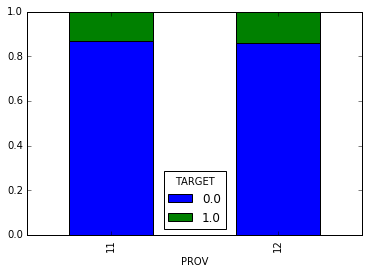

In [39]:
table=pd.crosstab(data.PROV, data.TARGET)
table.div(table.sum(1).astype(float),
axis=0).plot(kind='bar', stacked=True)

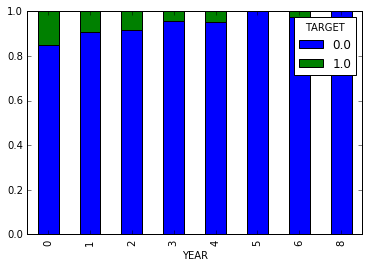

In [59]:
data1['YEAR'] = (2017-data1.RGYEAR)/10
data1['YEAR'] = data1.YEAR.map(int)

data = data1[['YEAR','TARGET']][data1.TARGET.notnull()]
table=pd.crosstab(data.YEAR, data.TARGET)
table.div(table.sum(1).astype(float),
axis=0).plot(kind='bar', stacked=True)

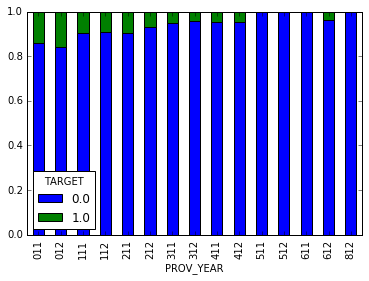

In [57]:
data1['PROV_YEAR'] = data1.YEAR.map(str)+data1.PROV.map(str)
data = data1[['PROV_YEAR','TARGET']][data1.TARGET.notnull()]
table=pd.crosstab(data.PROV_YEAR, data.TARGET)
table.div(table.sum(1).astype(float),
axis=0).plot(kind='bar', stacked=True)

/Users/tinkle1129/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


TypeError: Empty 'DataFrame': no numeric data to plot

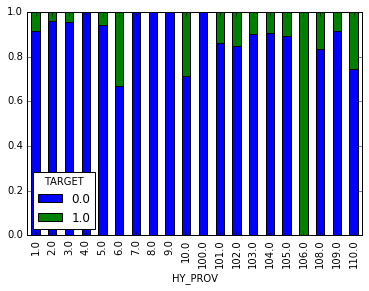

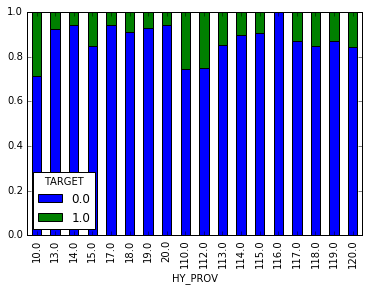

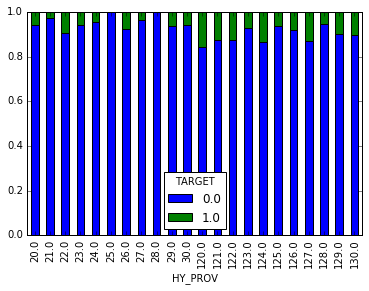

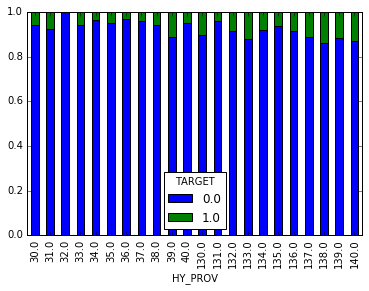

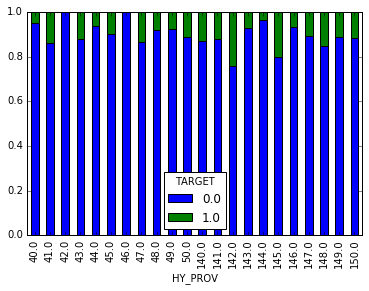

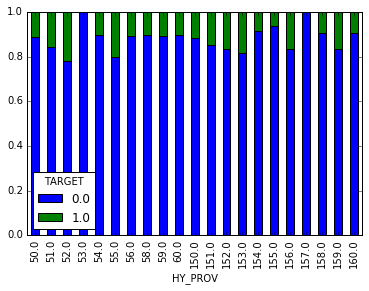

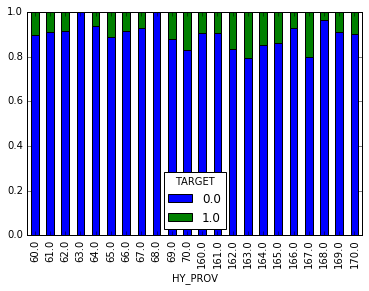

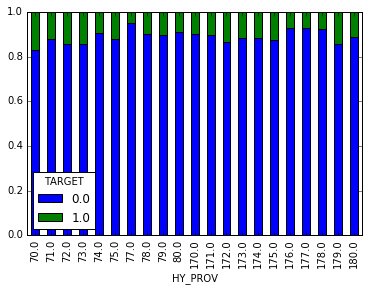

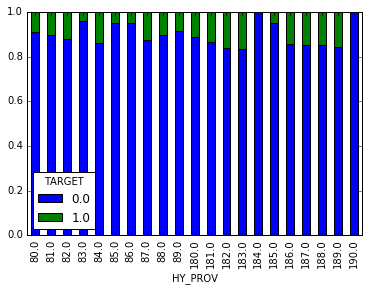

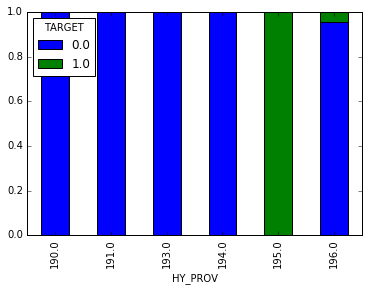

In [75]:
data1['HY'] = data1.HY.fillna(0)
data1['PROV'] = 12 - data1.PROV
data1['HY_PROV'] = data1['PROV']*100+data1.HY
for i in range(0,200,10):
    data = data1[['HY_PROV','TARGET']][data1.TARGET.notnull()][data1.HY>=i][data1.HY<=i+10]
    table=pd.crosstab(data.HY_PROV, data.TARGET)
    table.div(table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)